<a href="https://colab.research.google.com/github/SBakthavachalam/Data-Science---Project/blob/main/Decision_Tree_Pima_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze the data sets and identify the problem

In [2]:
import pandas as pd
df = pd.read_csv('/content/Pima .csv')
df.head(5)

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


explore the datasets

In [3]:
df.isnull().sum()

preg_count                     0
glucose_concentration          0
diastolic_bp                   0
triceps_skin_fold_thickness    0
two_hr_serum_insulin           0
bmi                            0
diabetes_pedi                  0
age                            0
diabetes_class                 0
dtype: int64

In [4]:
df.columns

Index(['preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age', 'diabetes_class'],
      dtype='object')

# Visualize the data sets.

In this data sets, looks like classification problem. yes/no problem

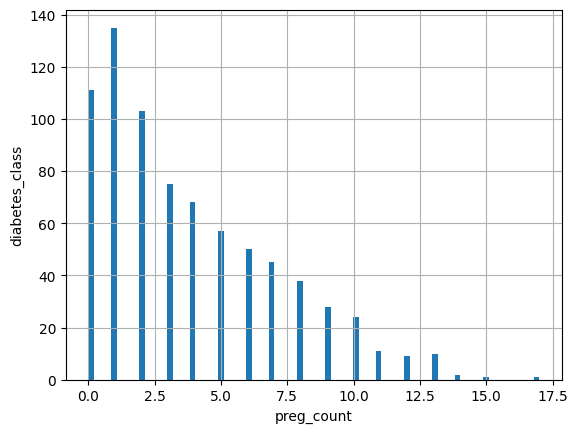

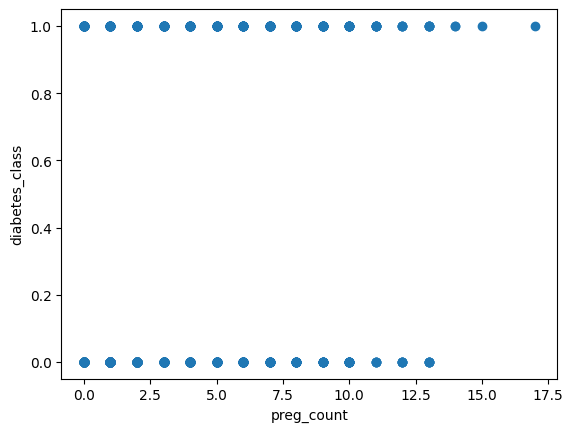

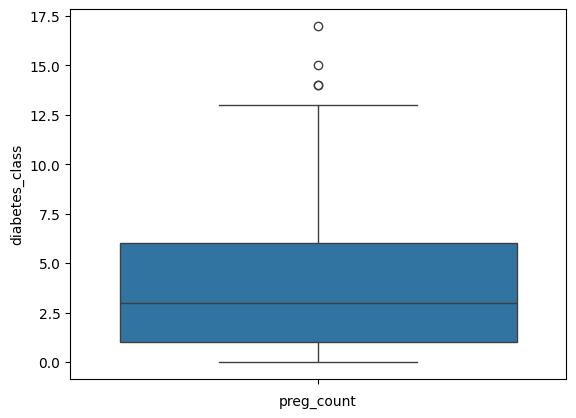

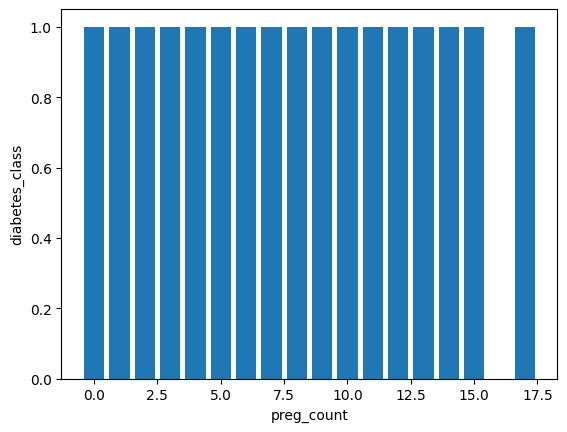

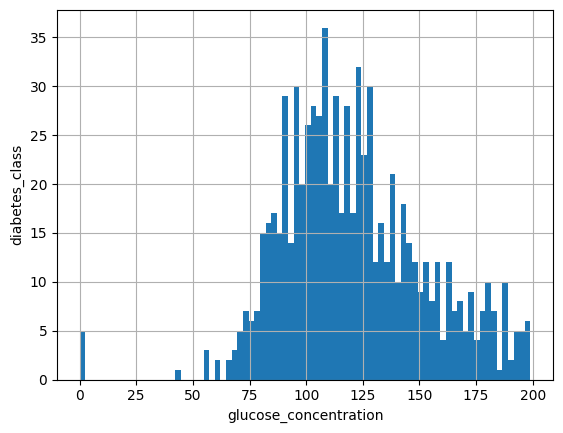

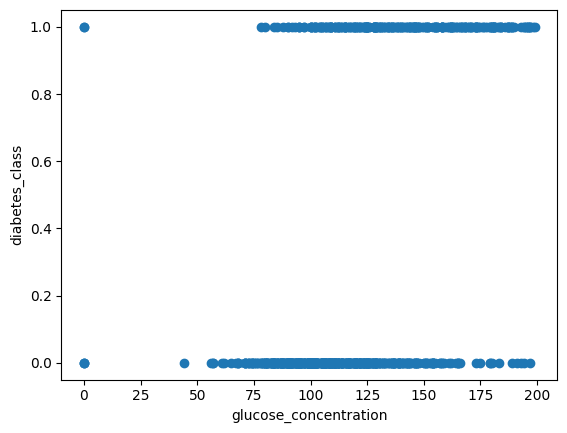

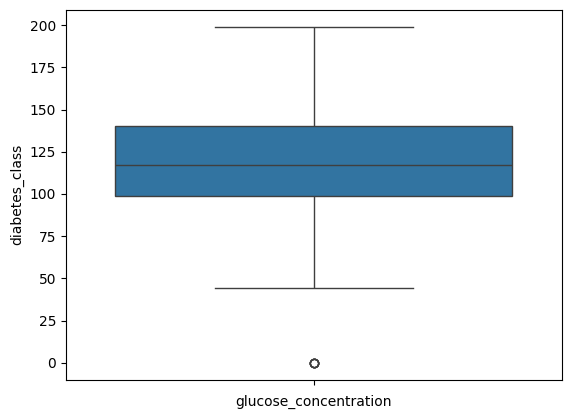

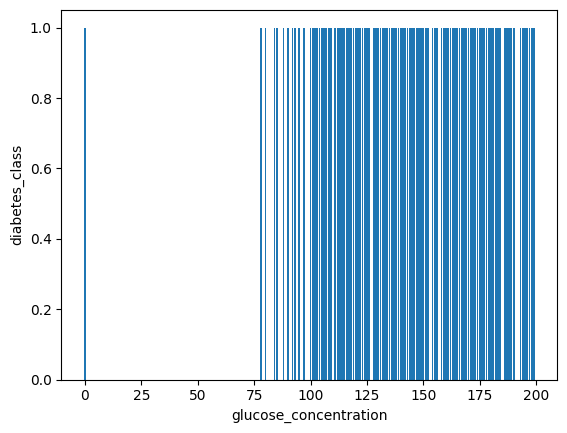

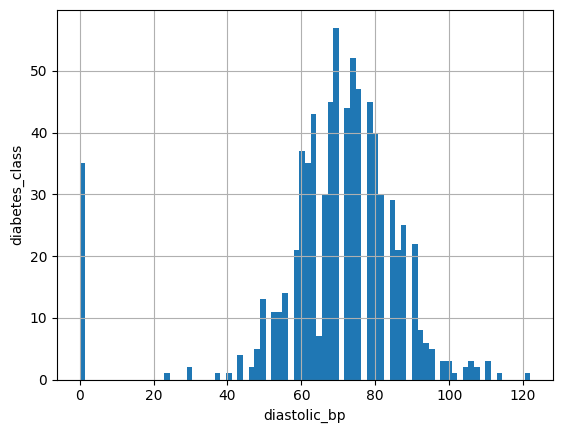

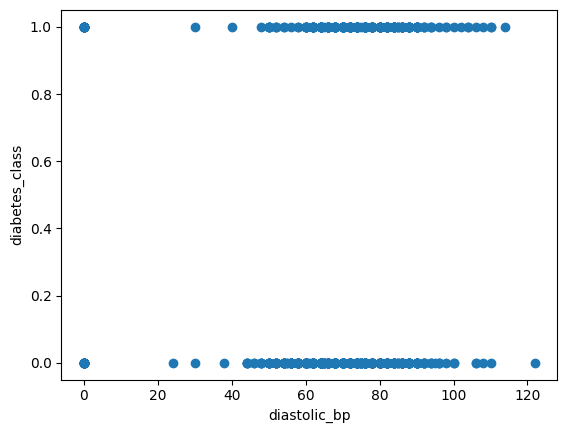

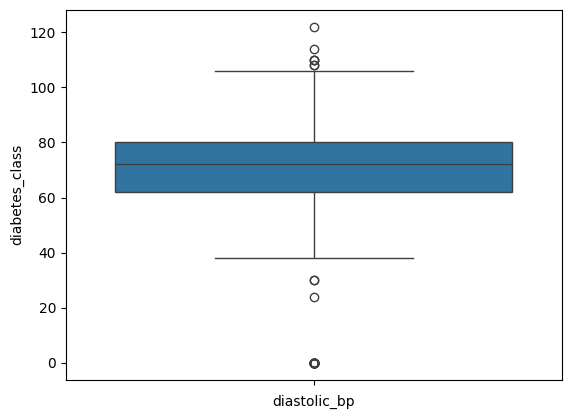

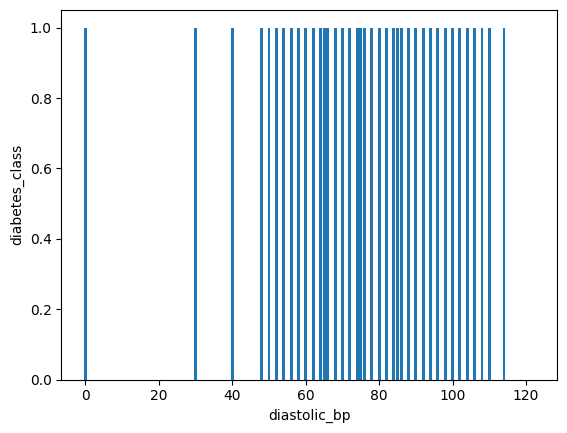

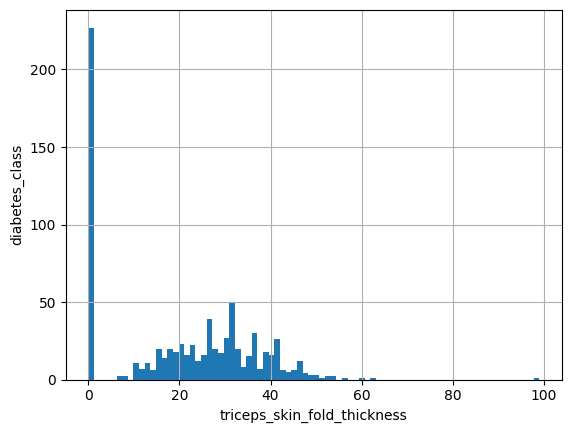

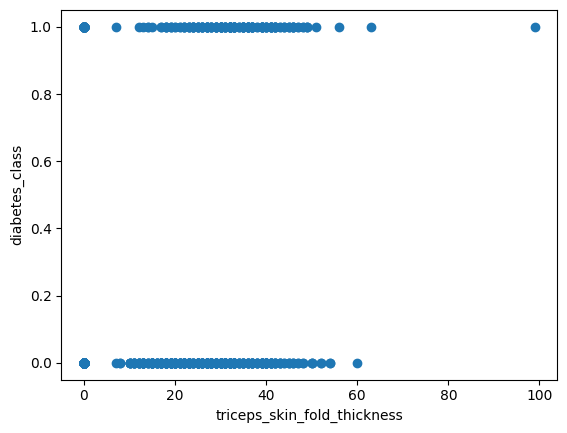

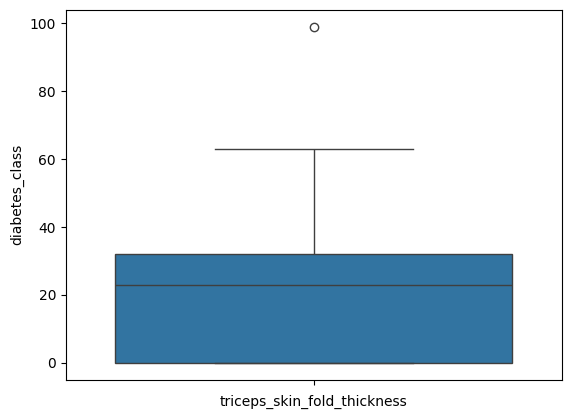

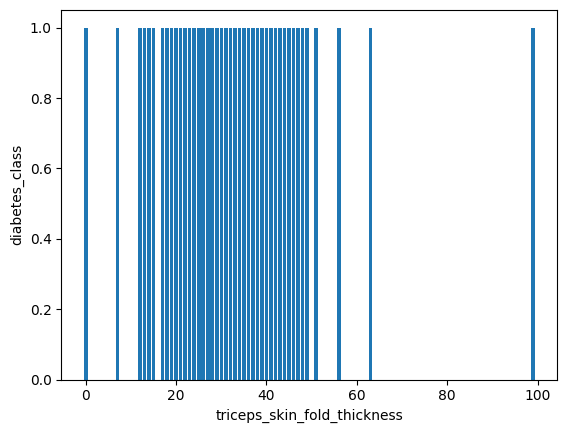

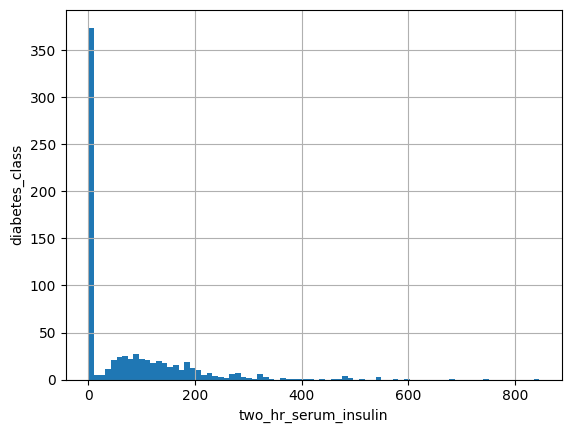

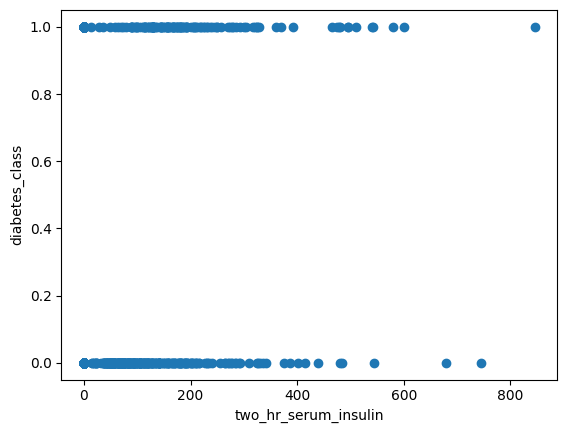

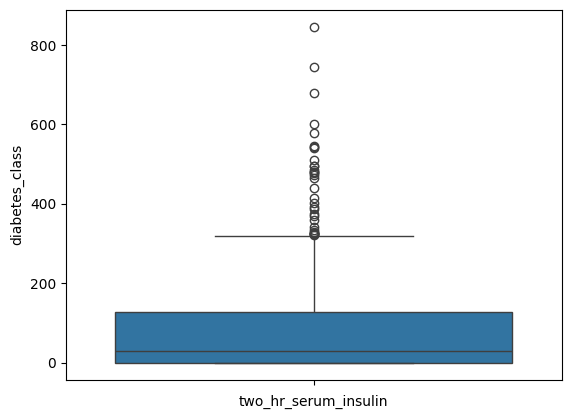

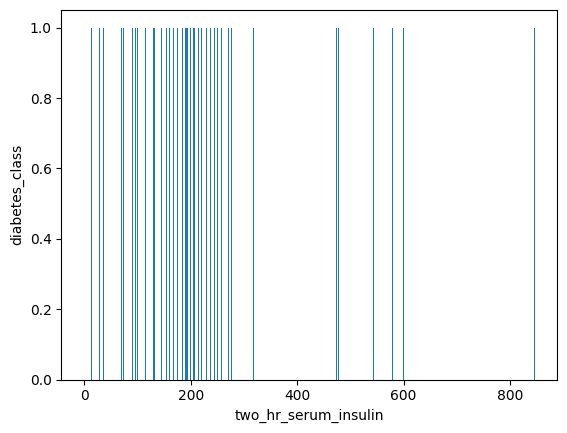

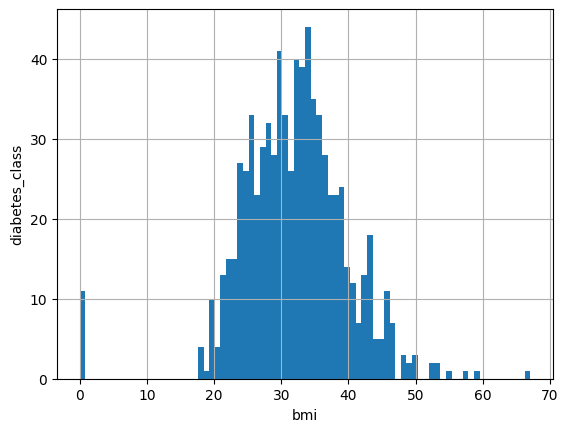

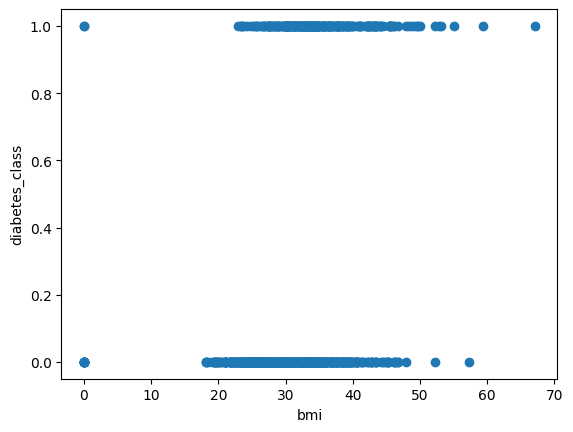

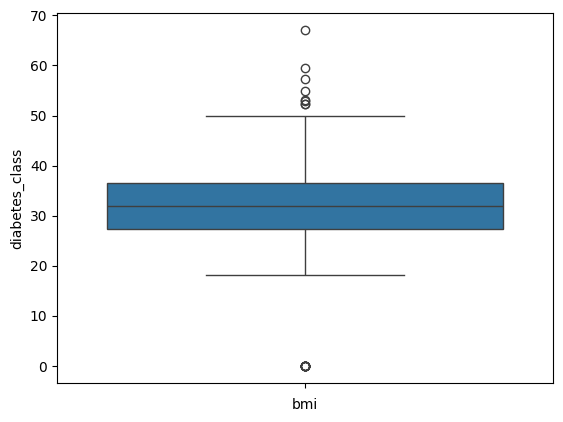

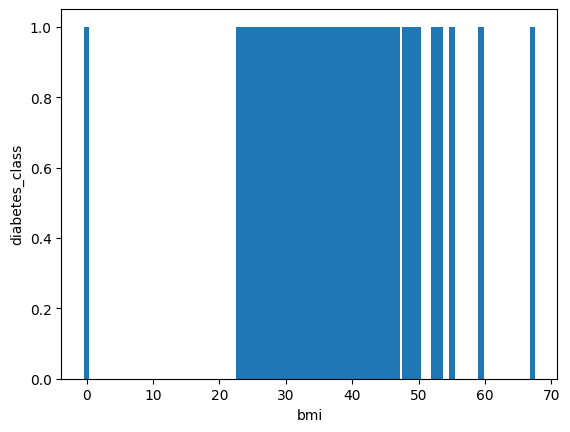

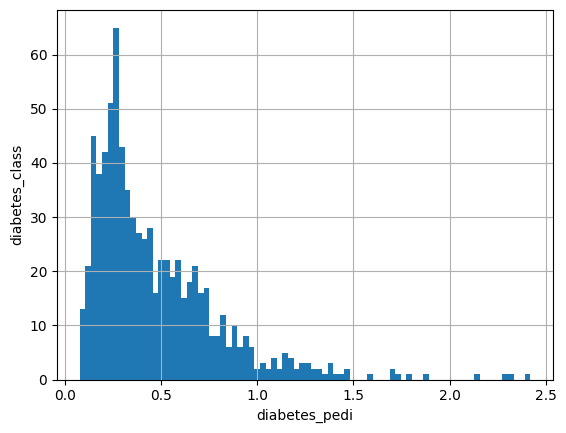

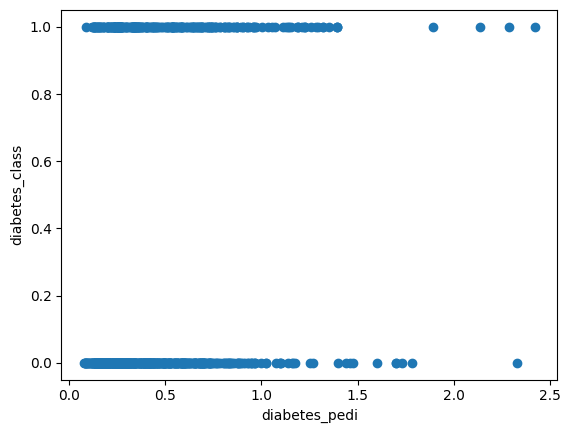

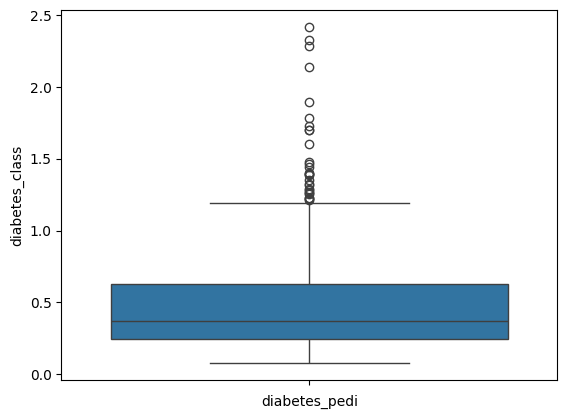

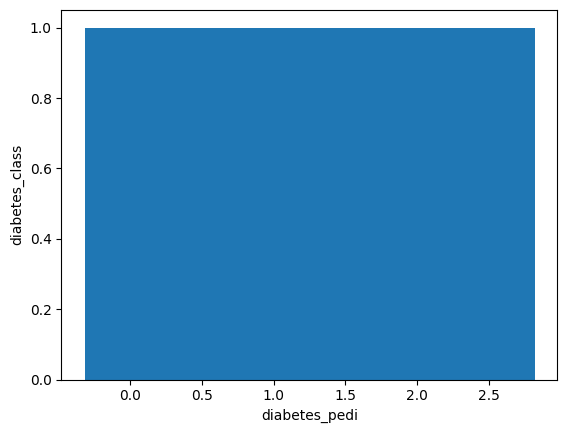

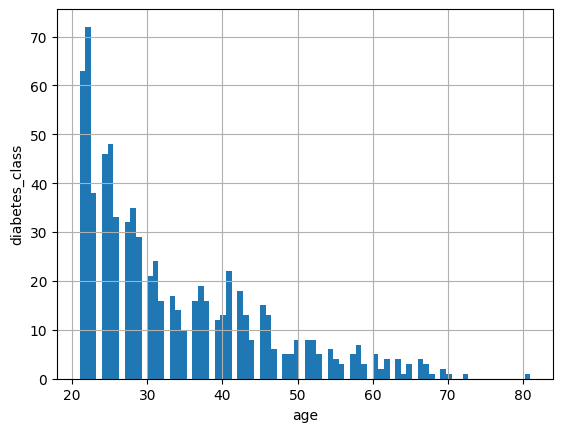

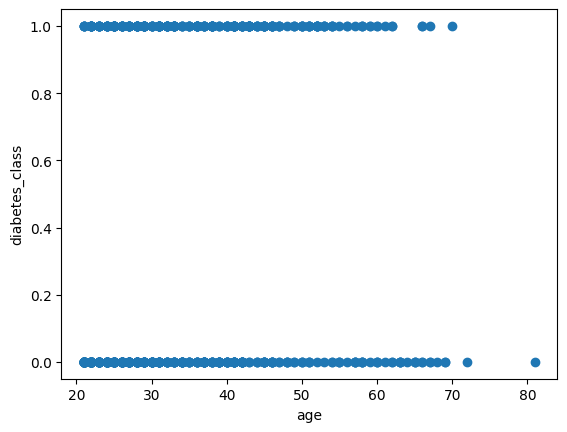

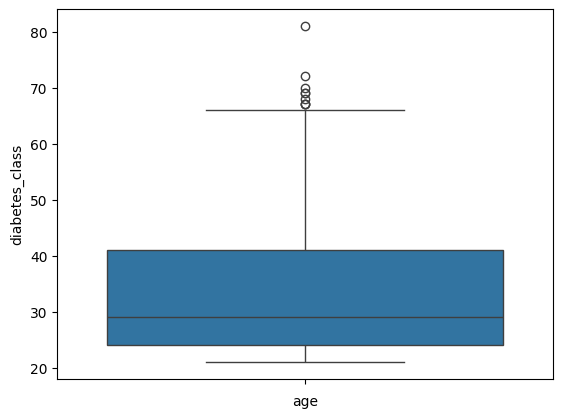

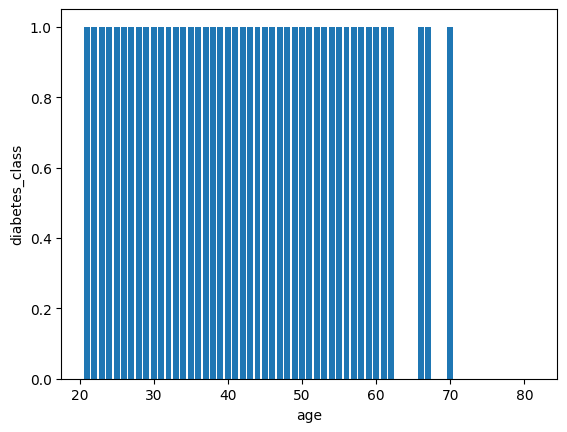

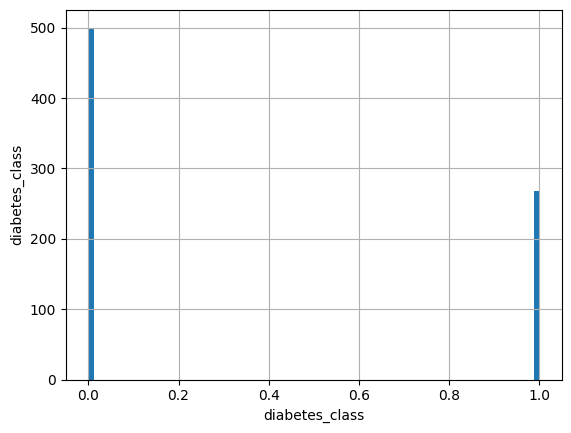

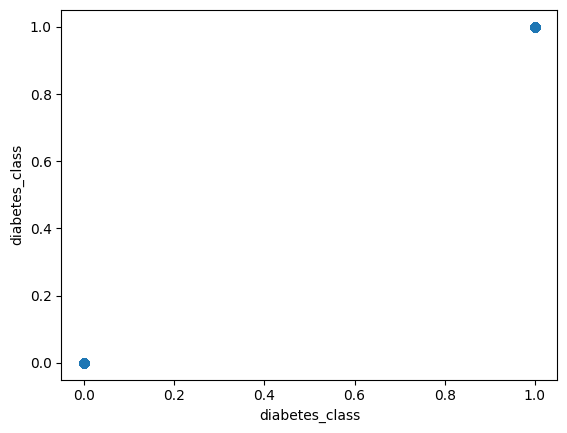

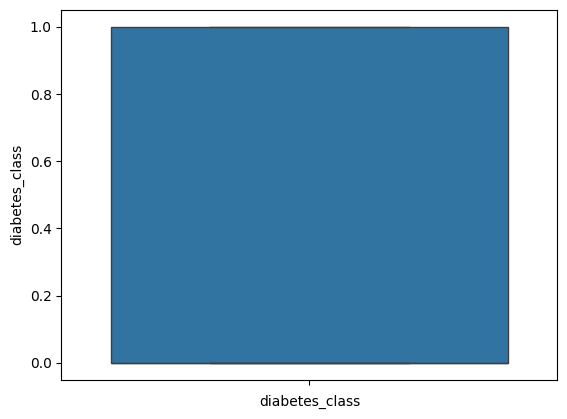

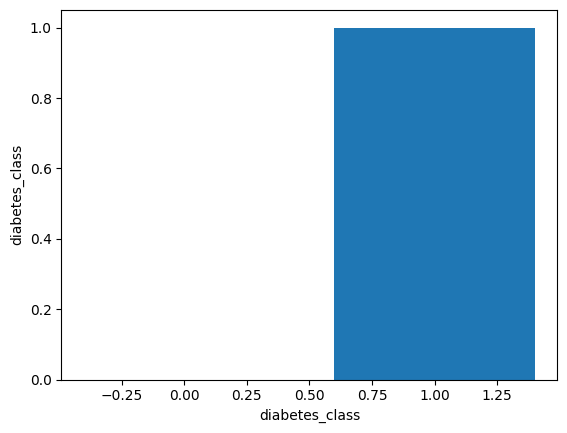

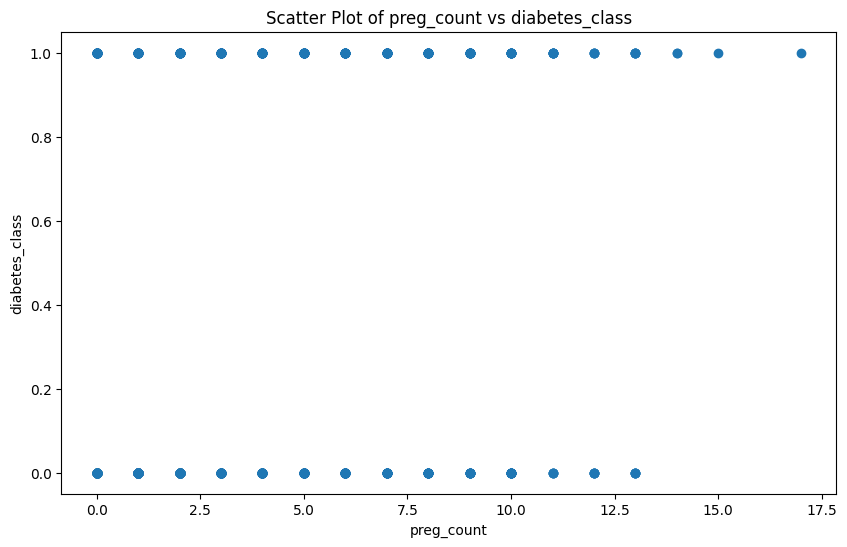

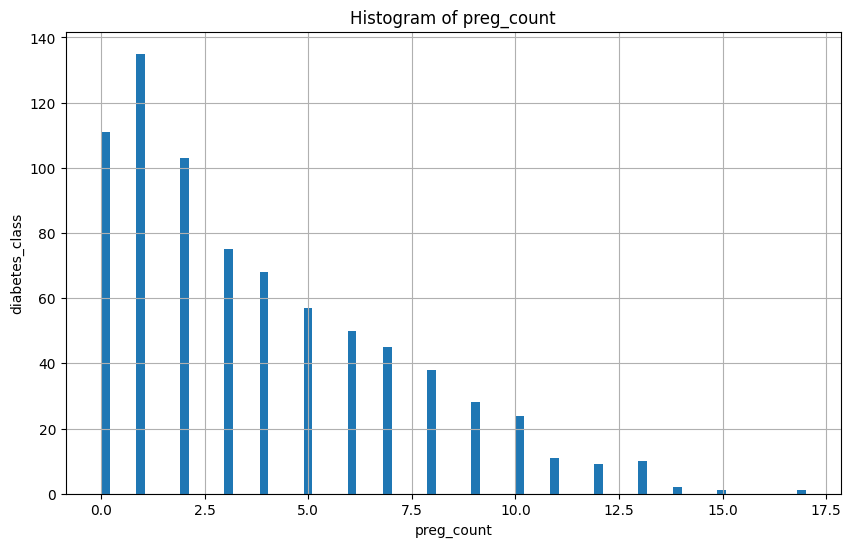

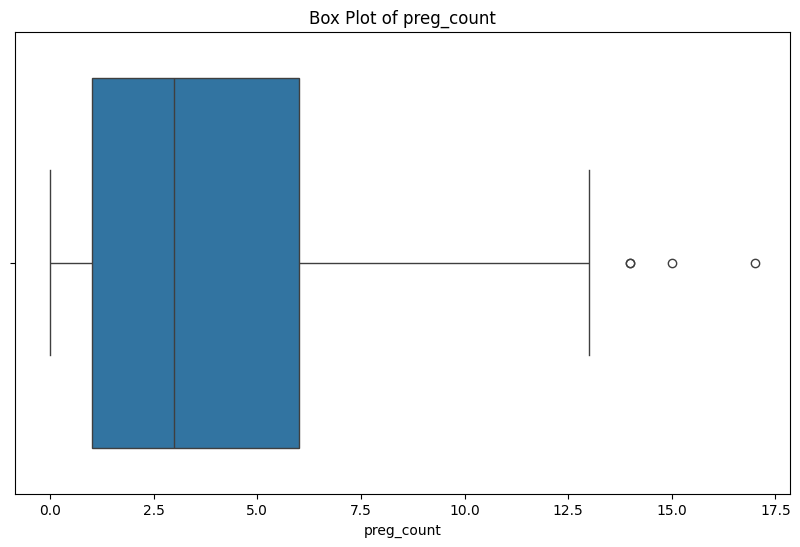

<ipython-input-14-bbd6fc8bacc0>:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[plot], y=df['diabetes_class'], ci=None)


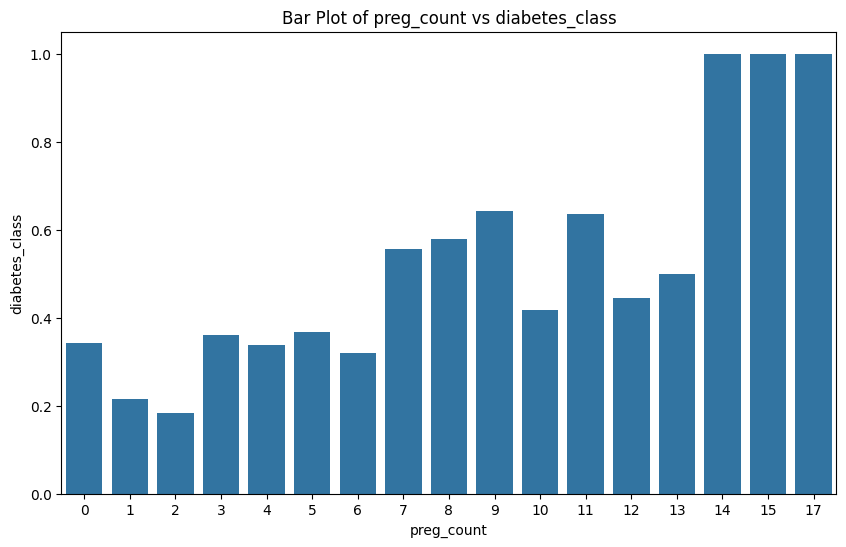

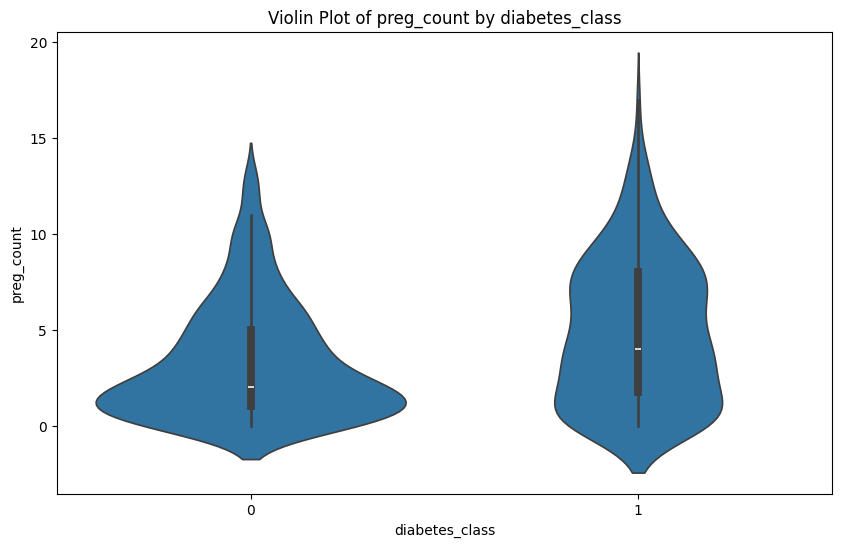

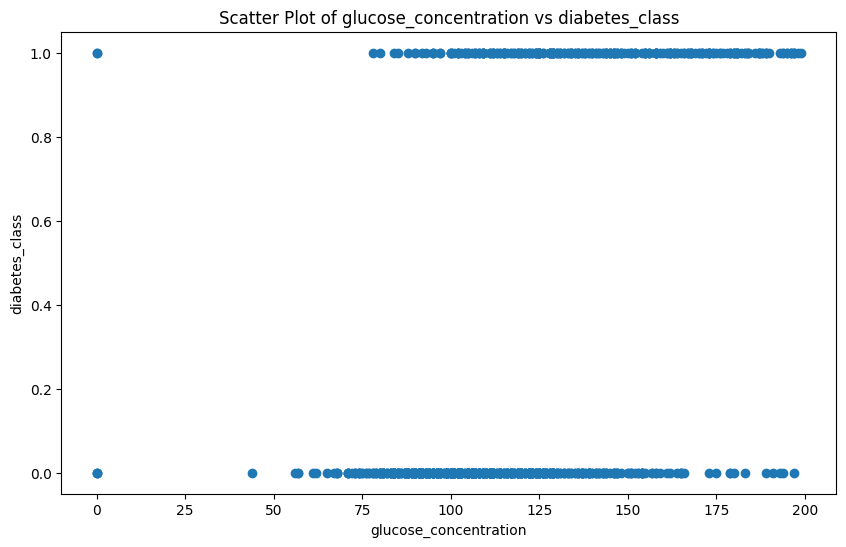

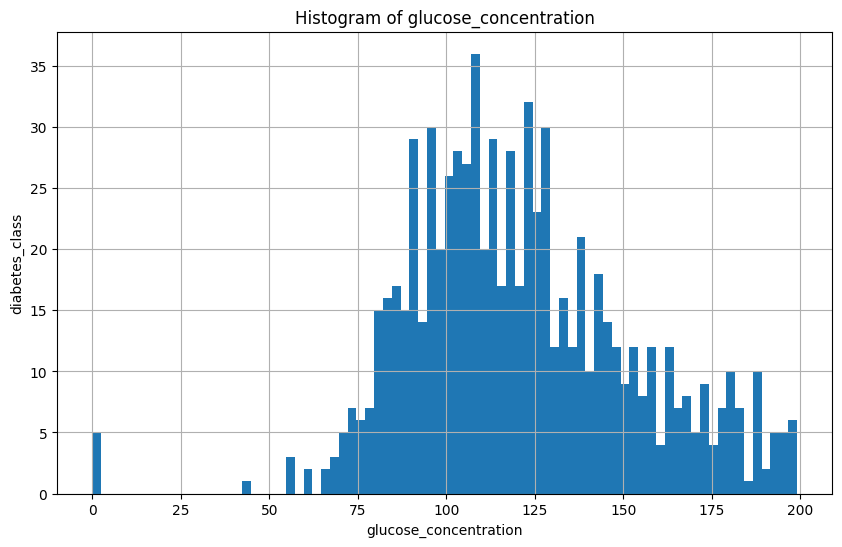

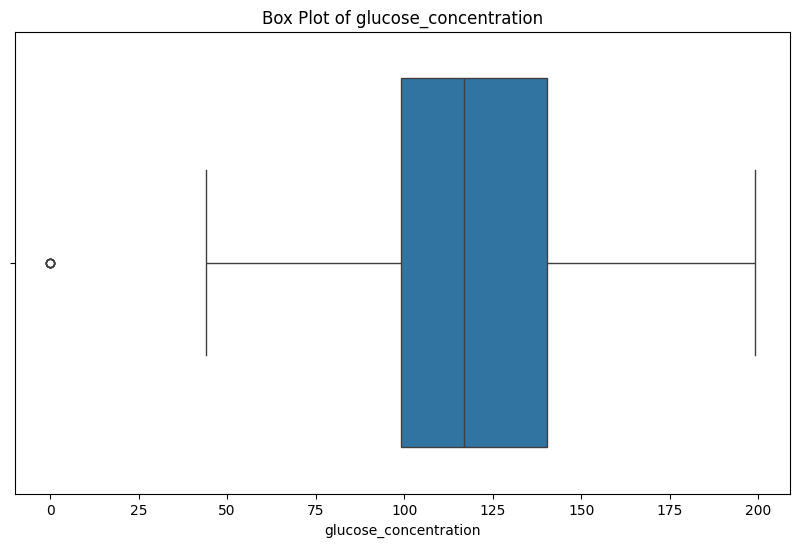

Skipping bar plot for glucose_concentration as it has too many unique values.


<Figure size 1000x600 with 0 Axes>

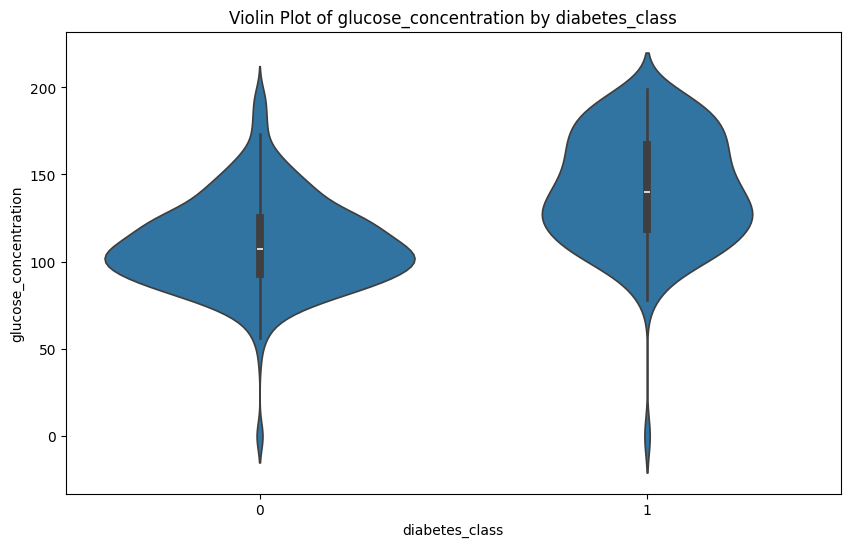

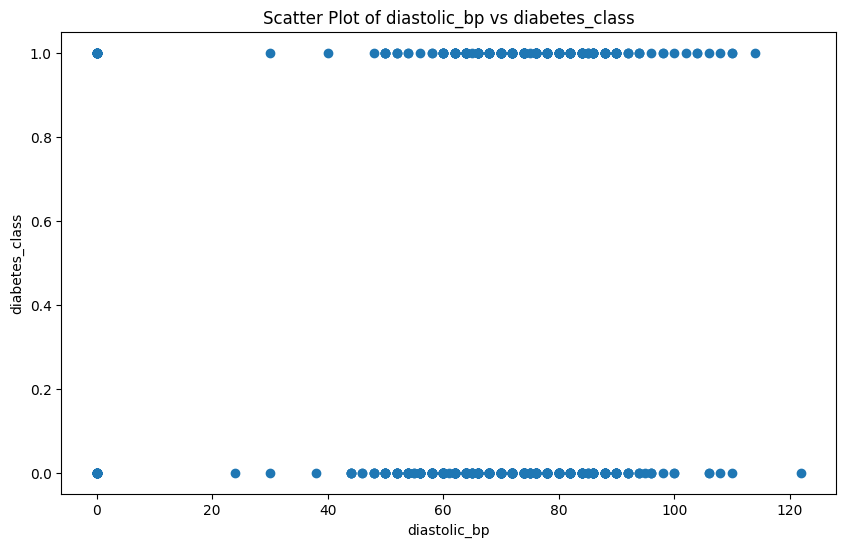

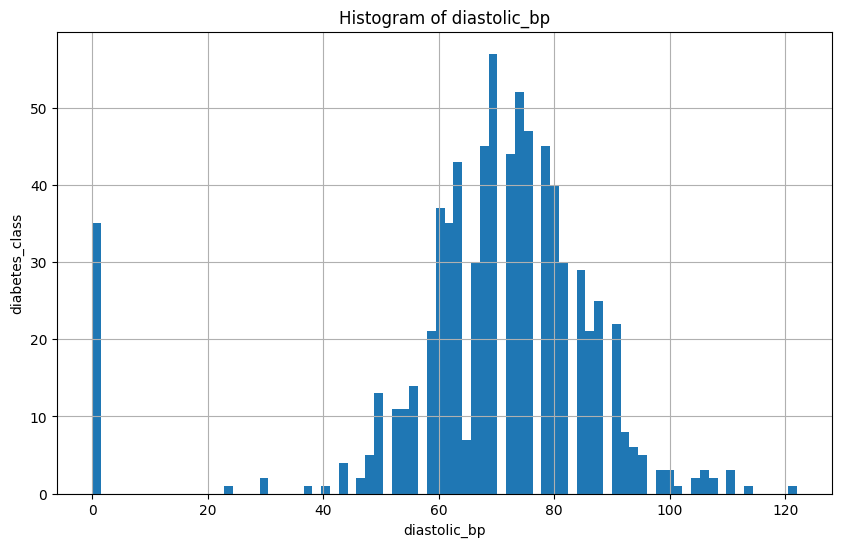

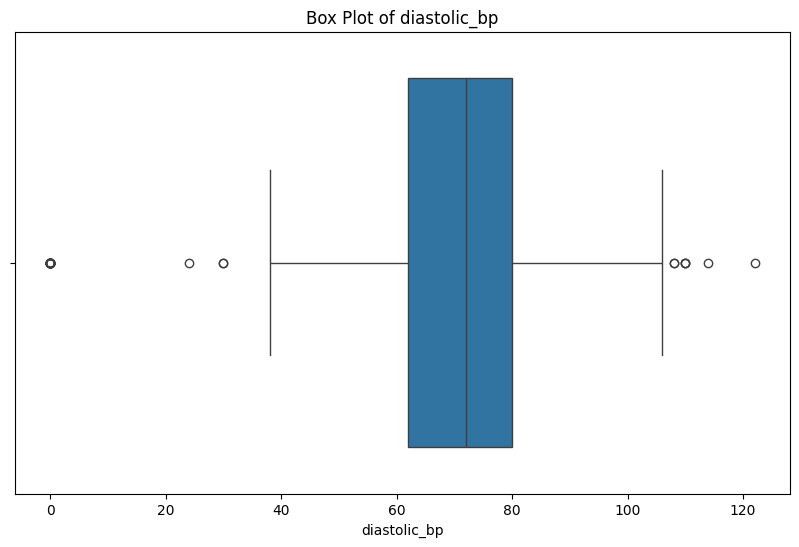

Skipping bar plot for diastolic_bp as it has too many unique values.


<Figure size 1000x600 with 0 Axes>

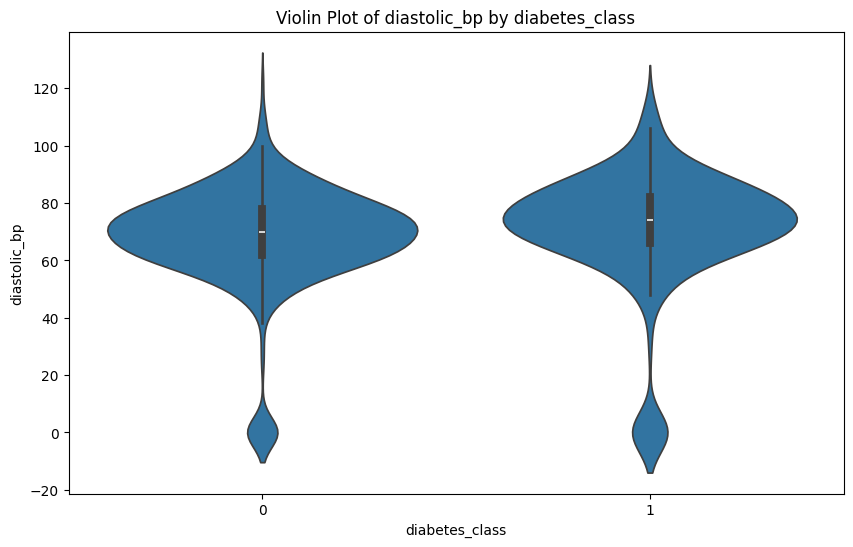

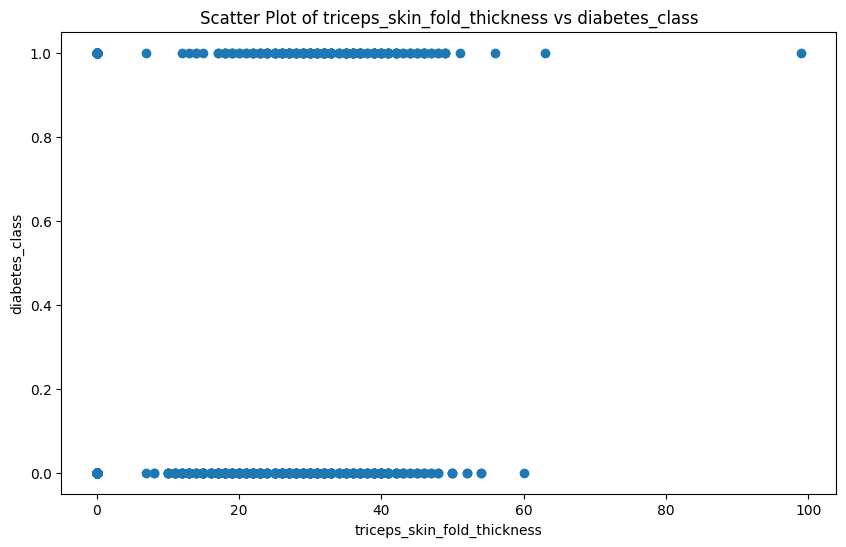

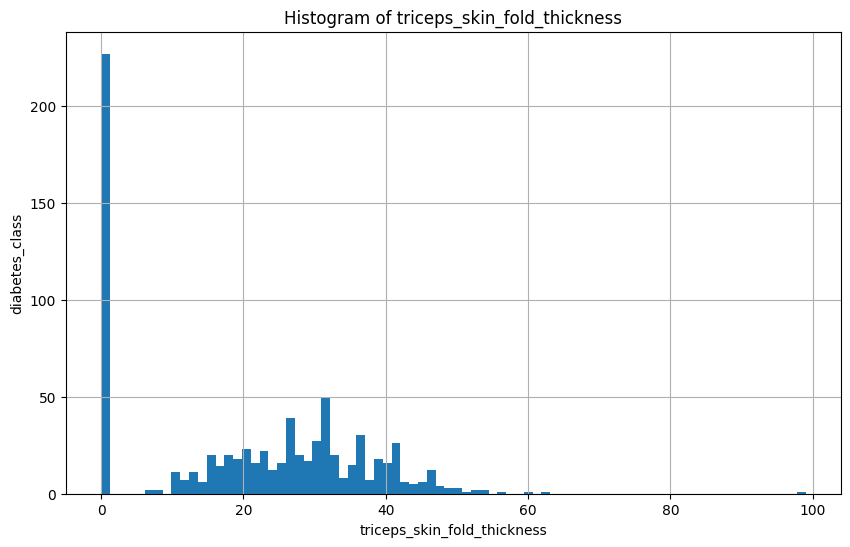

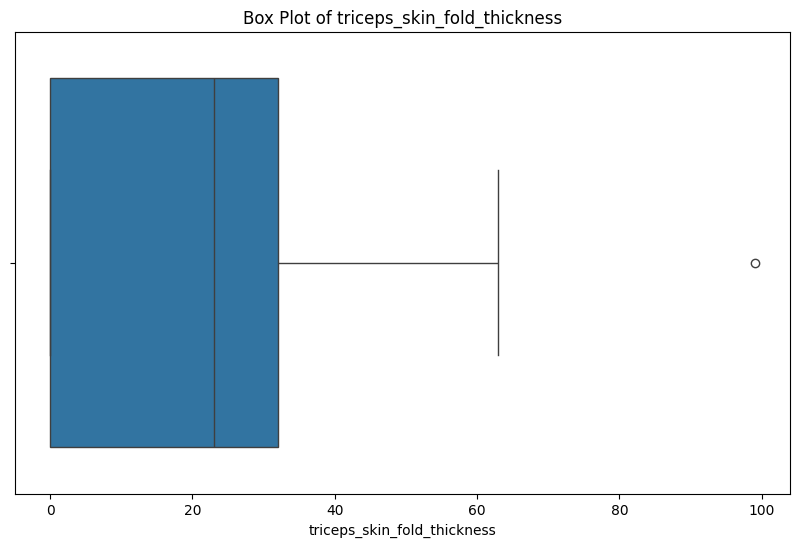

Skipping bar plot for triceps_skin_fold_thickness as it has too many unique values.


<Figure size 1000x600 with 0 Axes>

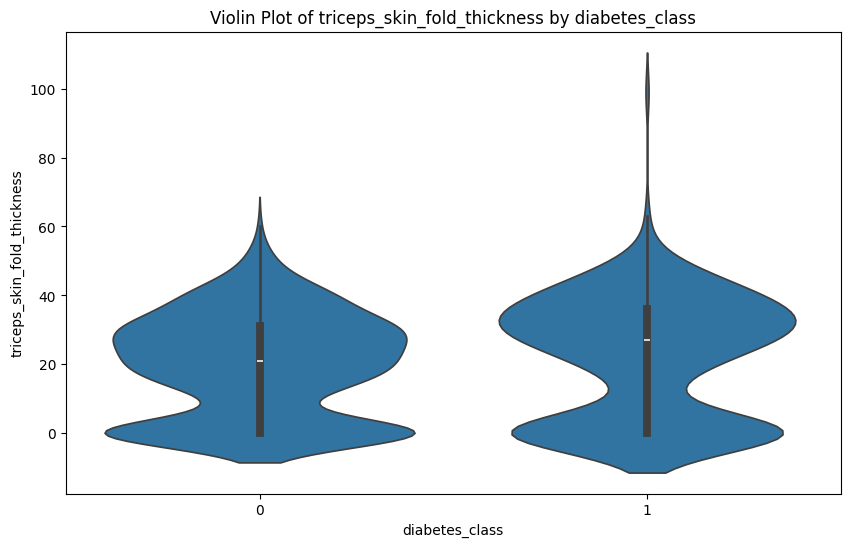

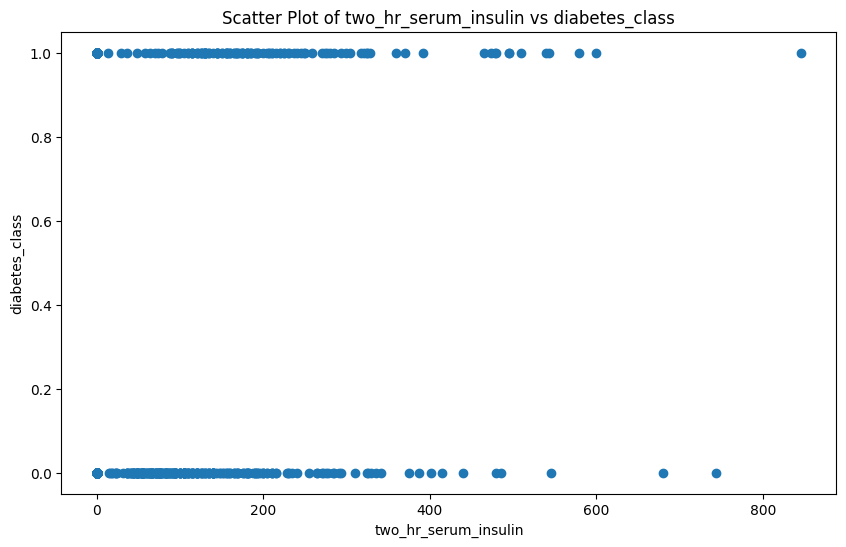

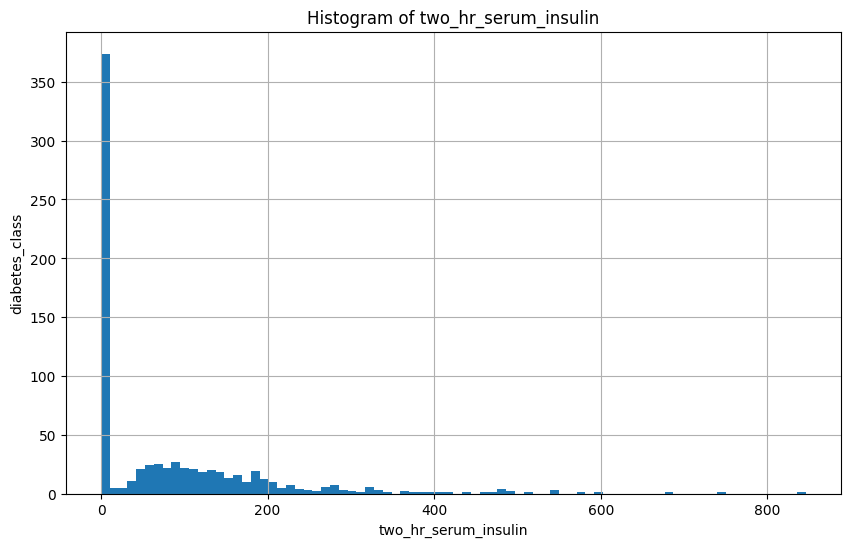

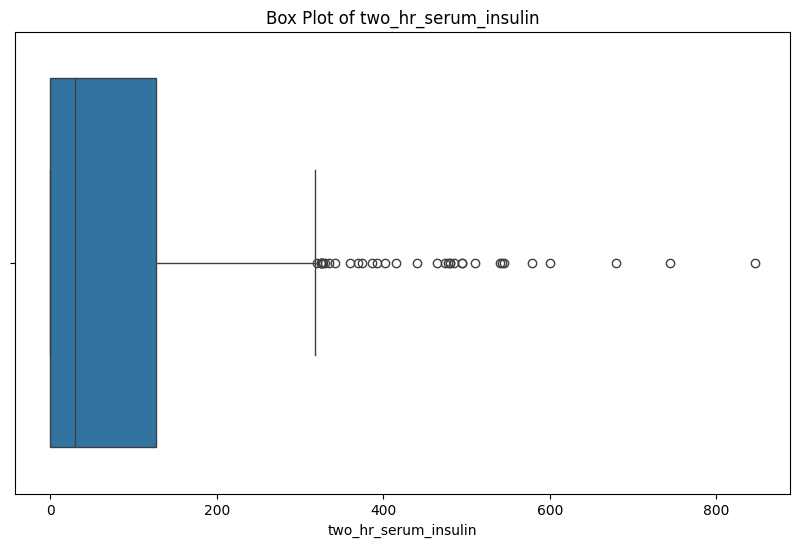

Skipping bar plot for two_hr_serum_insulin as it has too many unique values.


<Figure size 1000x600 with 0 Axes>

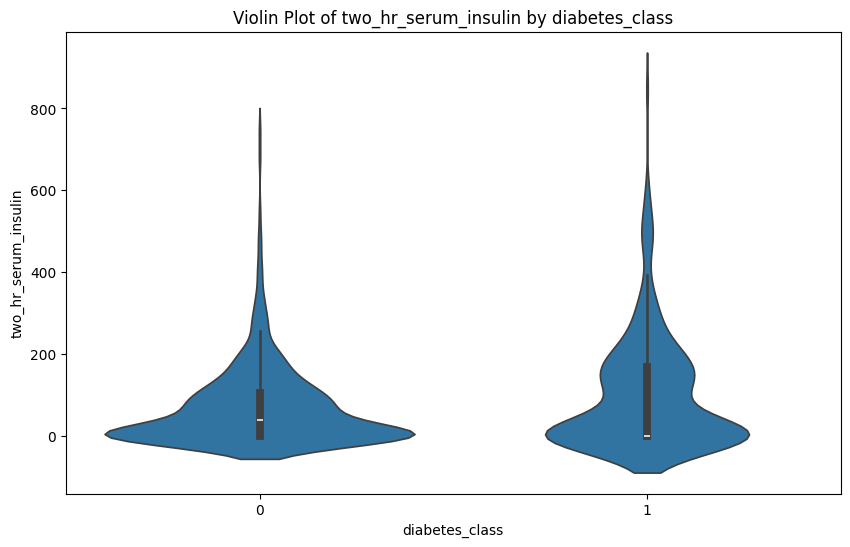

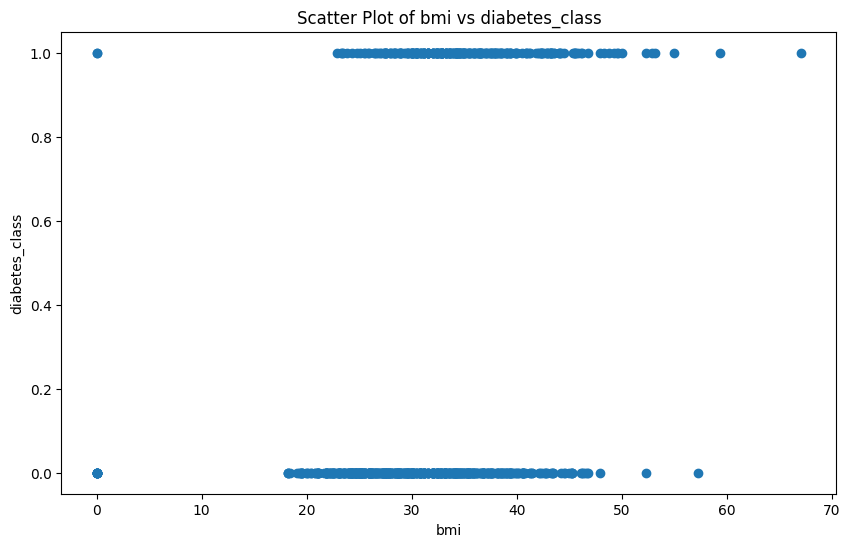

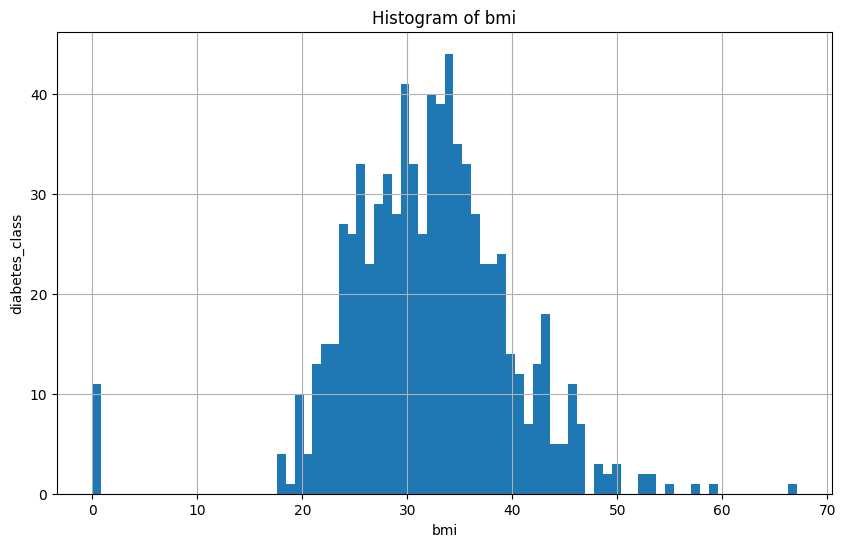

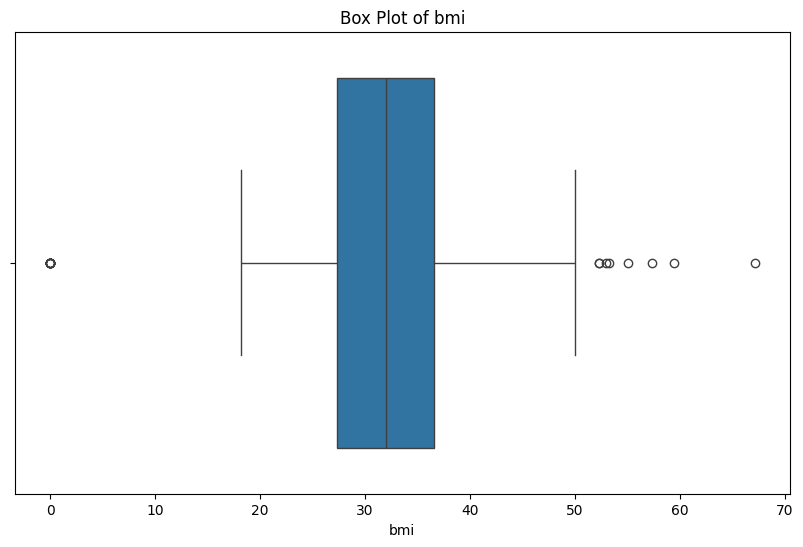

Skipping bar plot for bmi as it has too many unique values.


<Figure size 1000x600 with 0 Axes>

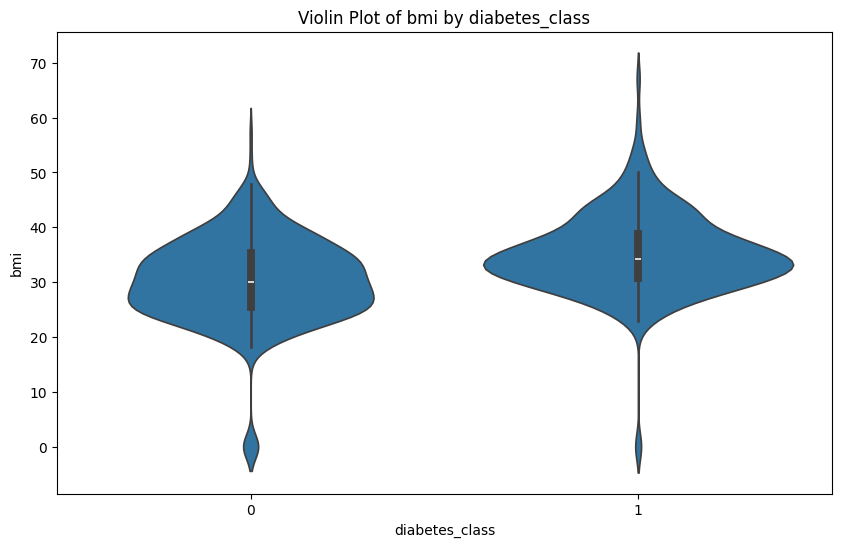

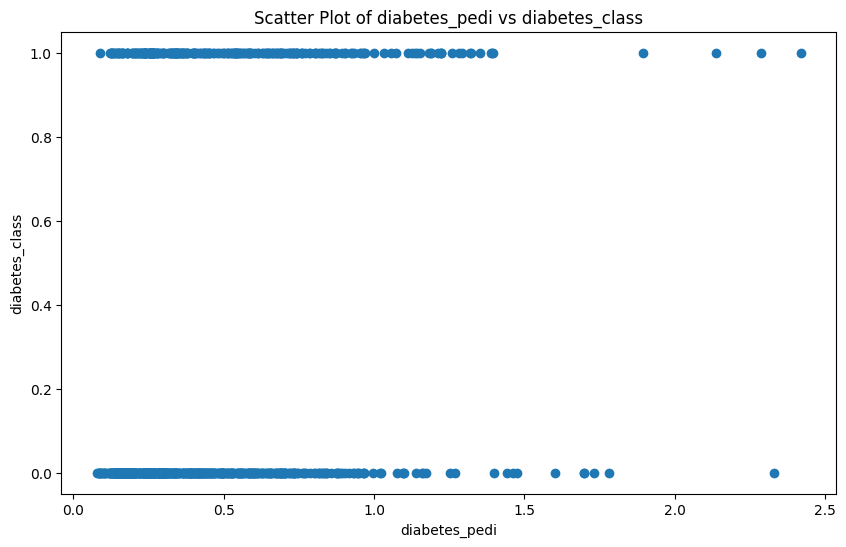

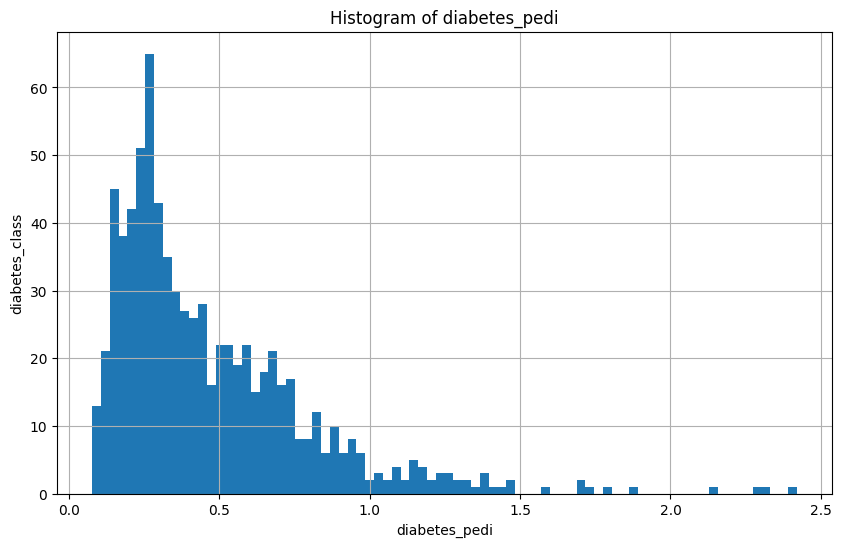

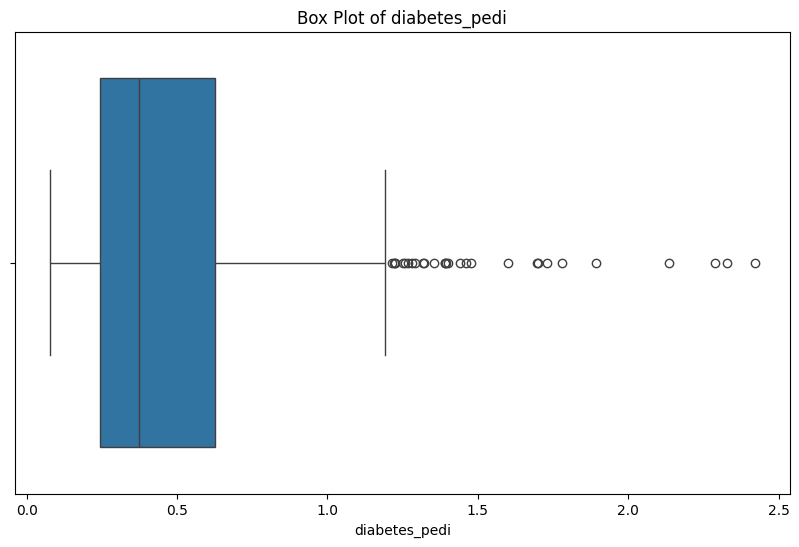

Skipping bar plot for diabetes_pedi as it has too many unique values.


<Figure size 1000x600 with 0 Axes>

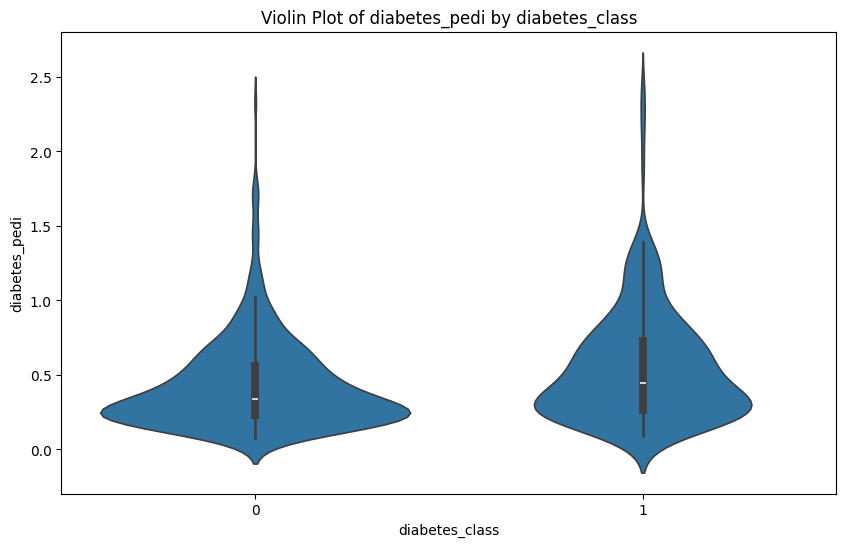

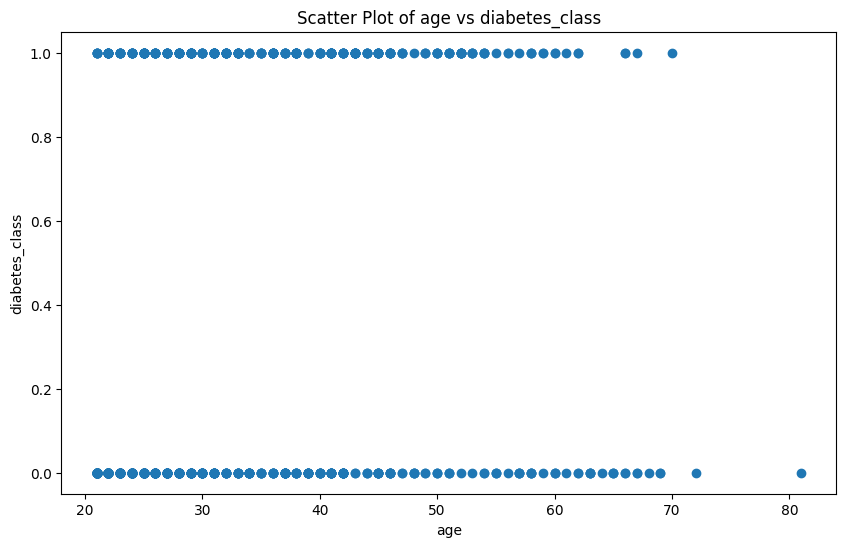

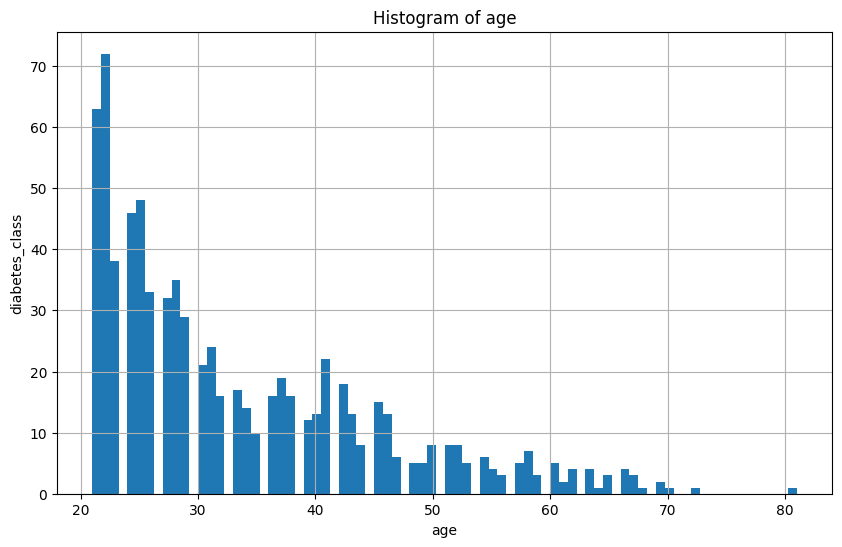

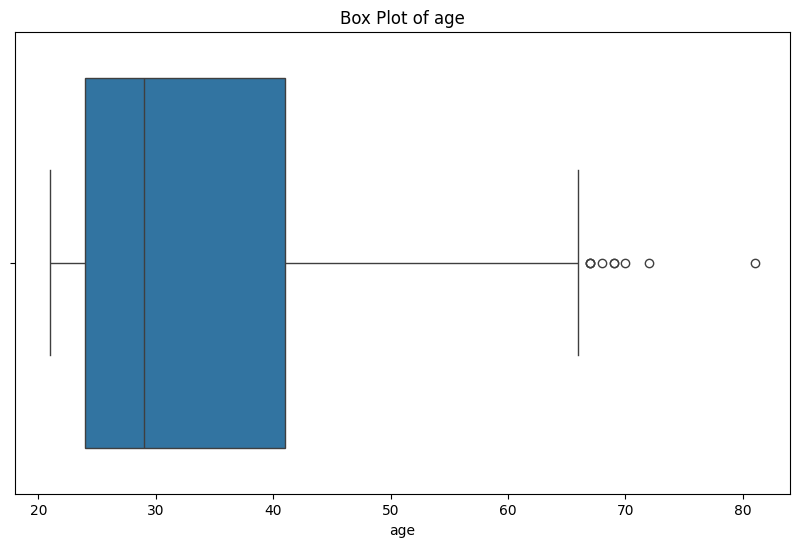

Skipping bar plot for age as it has too many unique values.


<Figure size 1000x600 with 0 Axes>

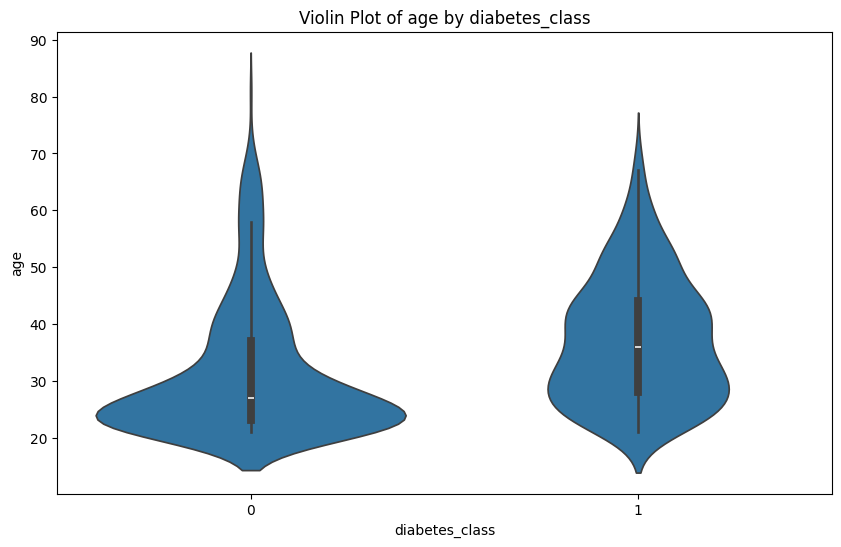

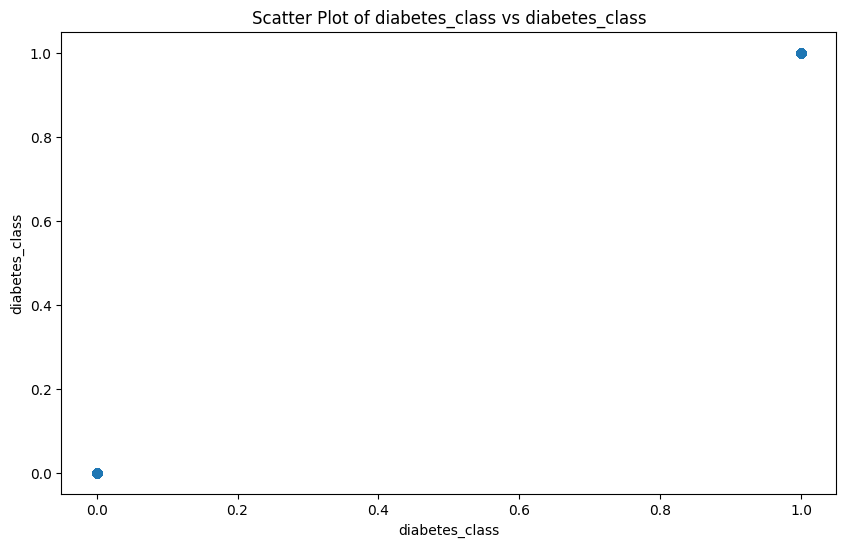

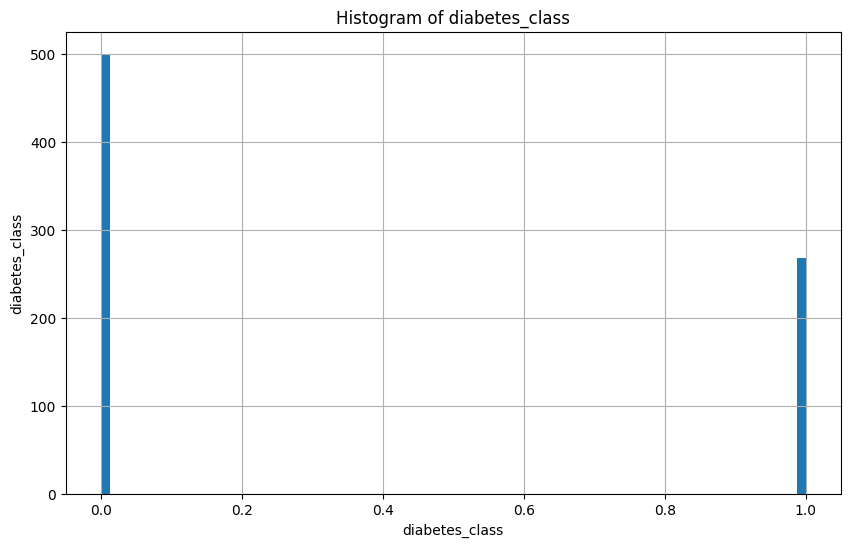

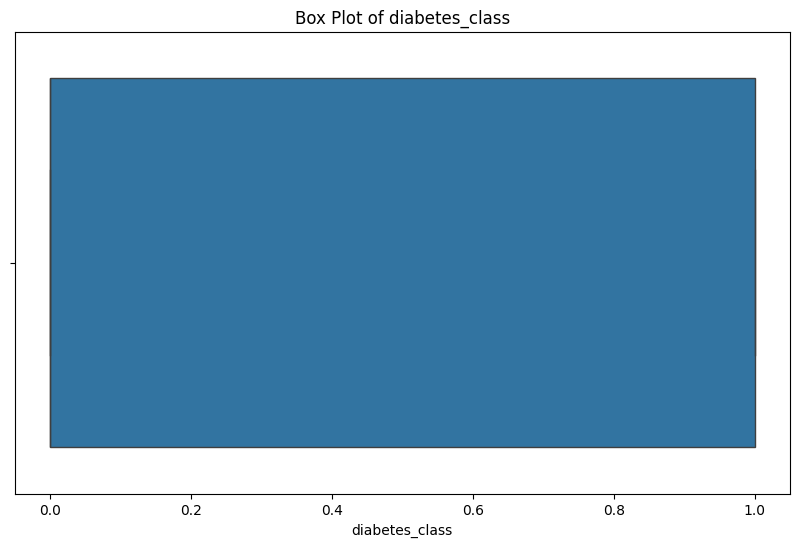

<ipython-input-14-bbd6fc8bacc0>:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df[plot], y=df['diabetes_class'], ci=None)


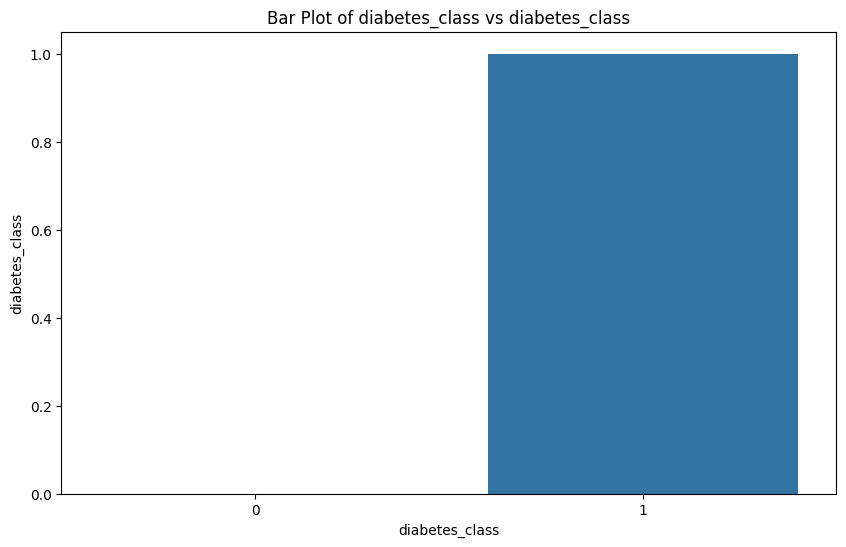

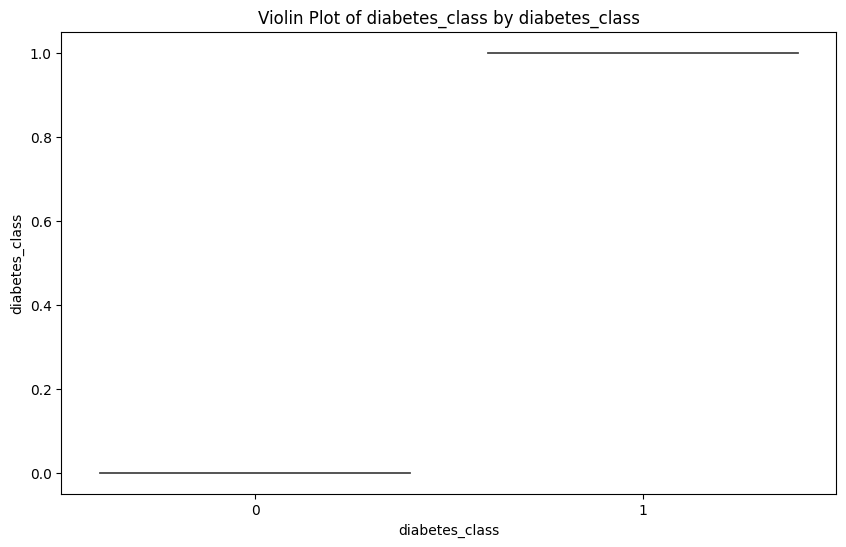

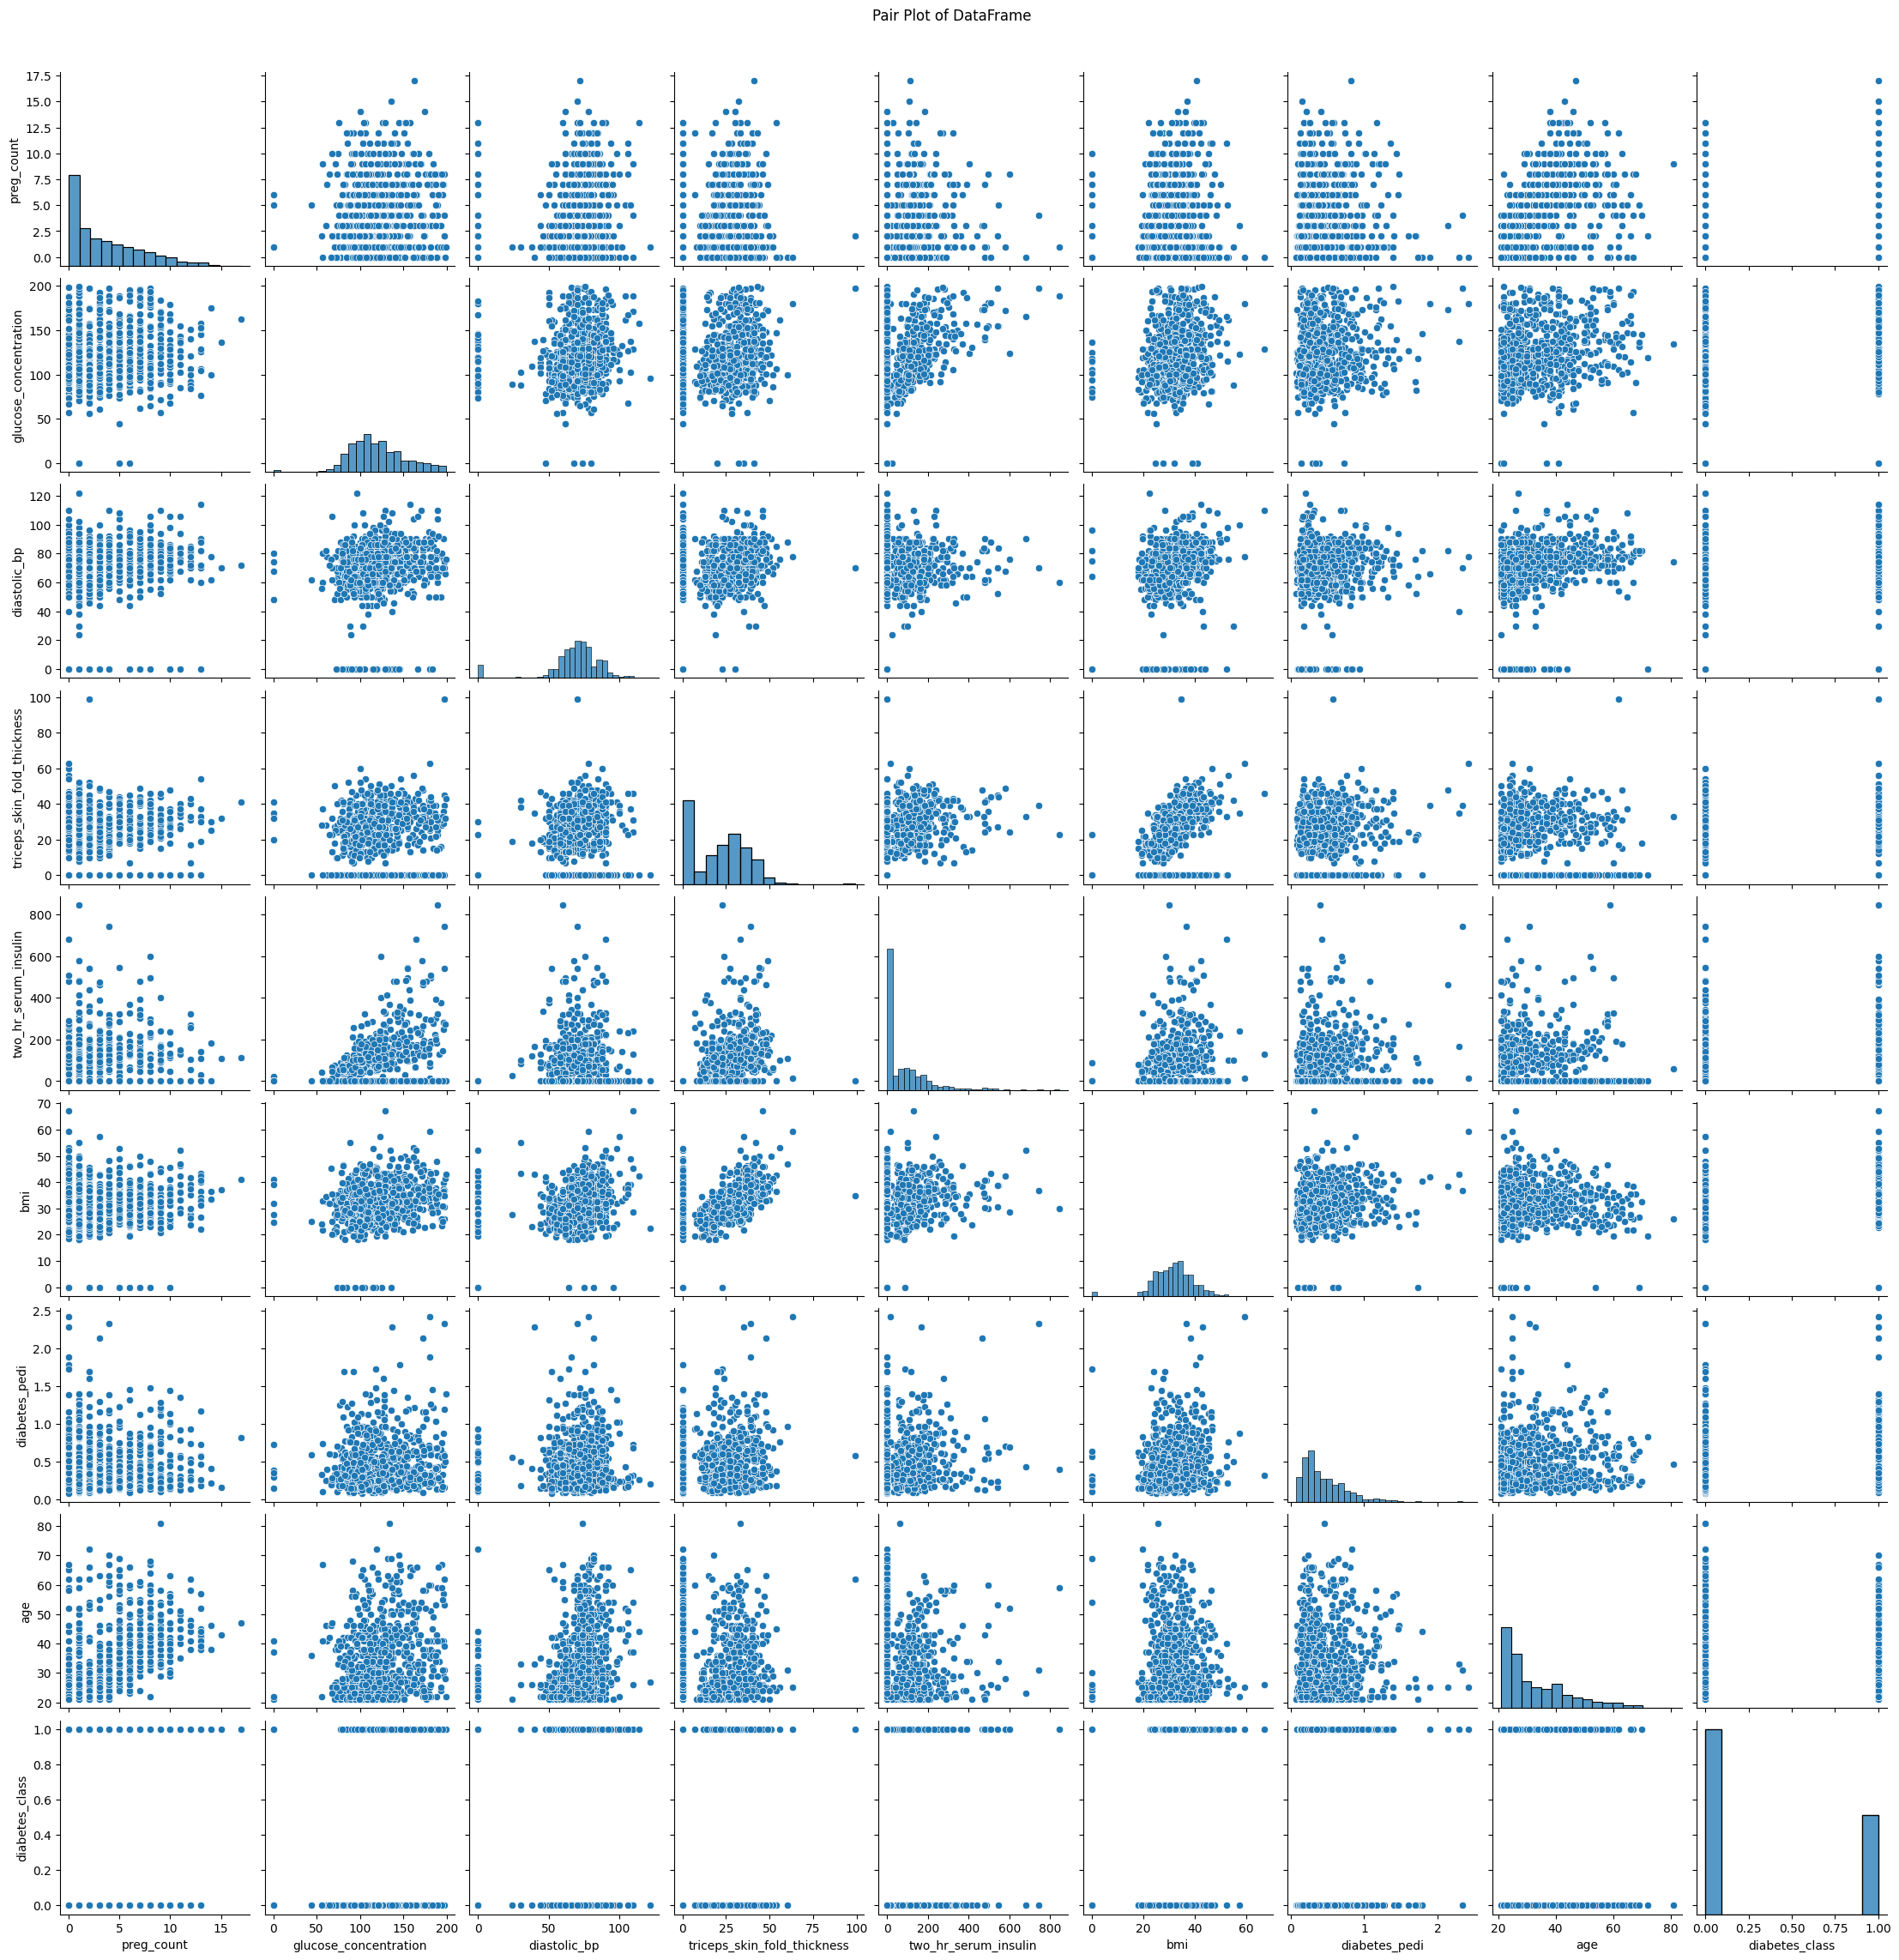

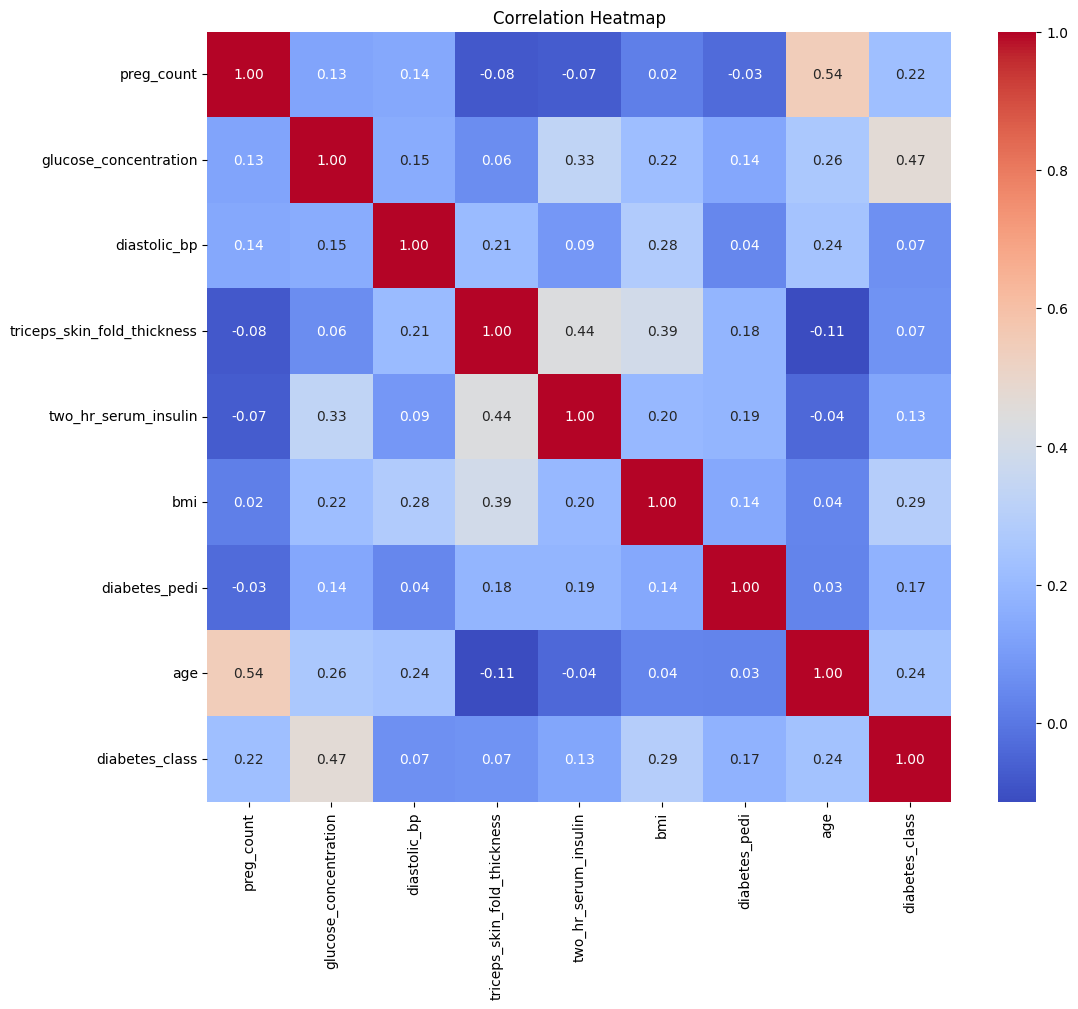

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over each column in the DataFrame
for plot in df.columns:
    # Scatter Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df[plot], df['diabetes_class'])
    plt.xlabel(plot)
    plt.ylabel('diabetes_class')
    plt.title(f'Scatter Plot of {plot} vs diabetes_class')
    plt.show()

    # Histogram
    plt.figure(figsize=(10, 6))
    df[plot].hist(bins=80)
    plt.xlabel(plot)
    plt.ylabel('diabetes_class')
    plt.title(f'Histogram of {plot}')
    plt.show()

    # Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[plot])
    plt.xlabel(plot)
    plt.title(f'Box Plot of {plot}')
    plt.show()

    # Bar Plot
    plt.figure(figsize=(10, 6))
    if df[plot].nunique() < 20:  # Ensuring the column has a reasonable number of unique values
        sns.barplot(x=df[plot], y=df['diabetes_class'], ci=None)
        plt.xlabel(plot)
        plt.ylabel('diabetes_class')
        plt.title(f'Bar Plot of {plot} vs diabetes_class')
        plt.show()
    else:
        print(f'Skipping bar plot for {plot} as it has too many unique values.')

    # Violin Plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='diabetes_class', y=df[plot], data=df)
    plt.xlabel('diabetes_class')
    plt.ylabel(plot)
    plt.title(f'Violin Plot of {plot} by diabetes_class')
    plt.show()

# Pair Plot
sns.pairplot(df)
plt.suptitle('Pair Plot of DataFrame', y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



# Identify feature and target

In [15]:
X = df[['preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']]
y = df['diabetes_class']

# Preprocess the feature

In [16]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(X)
x_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# Divide the data for training and testing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, train_size = 0.80, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.ndim, X_test.ndim, y_train.ndim, y_test.ndim)

(614, 8) (154, 8) (614,) (154,)
2 2 1 1


# Create Model by training data sets and predict the unseen test data

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# Check the model quality

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_test, y_pred)
confusionmatrix = confusion_matrix(y_test, y_pred)
print(report)
print(confusionmatrix)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154

[[78 21]
 [16 39]]


# Use PYCARET to identify best model

In [ ]:
!pip install pycaret

In [3]:
import pandas as pd
from pycaret.classification import *

# Load the dataset
df3 = pd.read_csv('/content/Pima .csv')

# Initialize the setup
clf = setup(df3, target='diabetes_class')

# Compare models
best_model = compare_models()


,Description,Value
0,Session id,3463
1,Target,diabetes_class
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7712,0.8371,0.6319,0.6893,0.6579,0.4867,0.4888,0.1910
lr,Logistic Regression,0.7674,0.8380,0.5836,0.7057,0.6345,0.4670,0.4745,0.0560
ridge,Ridge Classifier,0.7674,0.8376,0.5725,0.7109,0.6296,0.4635,0.4724,0.0390
lda,Linear Discriminant Analysis,0.7674,0.8375,0.5781,0.7098,0.6326,0.4655,0.4739,0.0350
gbc,Gradient Boosting Classifier,0.7637,0.8361,0.6257,0.6805,0.6479,0.4710,0.4754,0.1920
et,Extra Trees Classifier,0.7564,0.8049,0.5789,0.6765,0.6207,0.4437,0.4489,0.1960
rf,Random Forest Classifier,0.7524,0.8144,0.5880,0.6638,0.6176,0.4371,0.4432,0.3460
nb,Naive Bayes,0.7506,0.8140,0.6000,0.6620,0.6247,0.4395,0.4442,0.0380
xgboost,Extreme Gradient Boosting,0.7431,0.7924,0.6035,0.6459,0.6165,0.4253,0.4315,0.0850
lightgbm,Light Gradient Boosting Machine,0.7375,0.8008,0.6091,0.6294,0.6135,0.4160,0.4206,0.1370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]